# Notebook with data visualization to understand skew in the protected attributes and label on titanic data

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from load_data import load_data

### Titanic data (pre-prep)

In [2]:
train_data = pd.read_csv('/home/luiz/ufpb/mestrado/code/falsb/benchmark/data/titanic/titanic_train.csv', index_col='PassengerId')
test_data = pd.read_csv('/home/luiz/ufpb/mestrado/code/falsb/benchmark/data/titanic/titanic_test.csv', index_col='PassengerId')

data = pd.concat([train_data, test_data])

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(data.index)

1309

In [5]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Viz

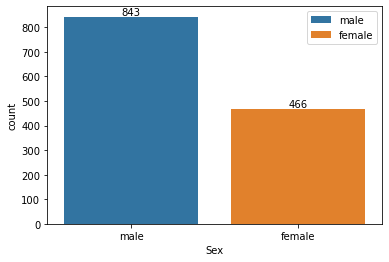

In [6]:
cols = ['Sex', 'count']
sex = ['male', 'female']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Sex'].value_counts()
train_df = pd.DataFrame(
    data=[
        [sex[0], train_counts[0]],
        [sex[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Sex',y='count',data=res_df,hue='Sex', dodge=False)
plt.legend(loc="upper right")
plt.show()


In [7]:
data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

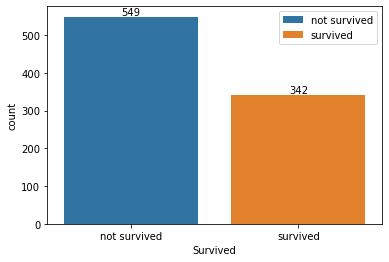

In [8]:
cols = ['Survived', 'count']
survived = ['not survived', 'survived']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Survived'].value_counts()
train_df = pd.DataFrame(
    data=[
        [survived[0], train_counts[0]],
        [survived[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Survived',y='count',data=res_df,hue='Survived', dodge=False)
plt.legend(loc="upper right")
plt.show()

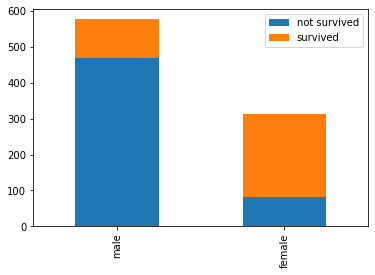

In [9]:
survived = data[data['Survived'] == 1]
man_surv = len(survived[survived['Sex'] == 'male'].index)
woman_surv = len(survived[survived['Sex'] == 'female'].index)

not_survived = data[data['Survived'] == 0]
man_not = len(not_survived[not_survived['Sex'] == 'male'].index)
woman_not = len(not_survived[not_survived['Sex'] == 'female'].index)


res_df = pd.DataFrame(
    {
        'not survived': [man_not, woman_not],
        'survived': [man_surv, woman_surv],
    },
    index=['male', 'female']
)

res_df.plot(kind='bar', stacked=True)#, color=['red', 'pink'])
plt.legend(loc="upper right")
plt.show()

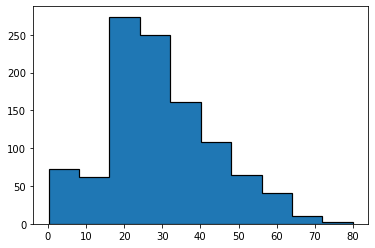

In [10]:
# data['Age'].hist()
plt.hist(data['Age'], histtype="stepfilled", edgecolor='k', linewidth=1.2)
plt.show()

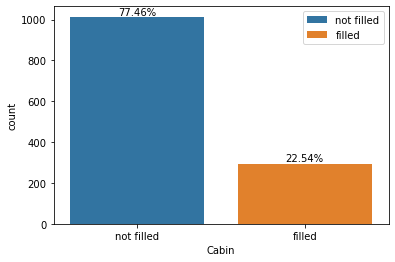

In [11]:
cols = ['Cabin', 'count', 'percent']
filled = ['not filled', 'filled']
res_df = pd.DataFrame(columns=cols, dtype='object')

counts_nan = data['Cabin'].isna().sum()
count_not_nan = data['Cabin'].count().sum()
res_df = pd.DataFrame(
    data=[
        [filled[0], counts_nan, counts_nan/len(data['Cabin'].index)],
        [filled[1], count_not_nan, count_not_nan/len(data['Cabin'].index)]
    ],
    columns=cols
)

for i in res_df.index:
    percent = np.round(res_df.loc[i, 'percent']*100, 2)
    percent = f'{percent}%'
    y = res_df.loc[i, 'count']
    plt.annotate(percent, (i, y), ha="center", va="bottom")

sns.barplot(x='Cabin',y='count',data=res_df,hue='Cabin', dodge=False)
plt.legend(loc="upper right")
plt.show()

In [12]:
print(data['Embarked'].value_counts())
print(data['Embarked'].isna().sum())

S    914
C    270
Q    123
Name: Embarked, dtype: int64
2


### Titanic data (post-prep)

In [14]:
data = pd.read_csv('/home/luiz/ufpb/mestrado/code/falsb/benchmark/data/titanic/post_prep/titanic.csv', index_col='PassengerId')

In [15]:
data.head()

,Pclass,Fare,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Sex,Survived
PassengerId,,,,,,,,,,
1,3,7.2500,0,0,1,22,1,0,0,0
2,1,71.2833,1,0,0,38,1,0,1,1
3,3,7.9250,0,0,1,26,0,0,1,1
4,1,53.1000,0,0,1,35,1,0,1,1
5,3,8.0500,0,0,1,35,0,0,0,0


In [16]:
len(data.index)

712

In [17]:
data.columns

Index(['Pclass', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age',
       'SibSp', 'Parch', 'Sex', 'Survived'],
      dtype='object')

### Viz

In [20]:
data['Sex'].value_counts()

0    453
1    259
Name: Sex, dtype: int64

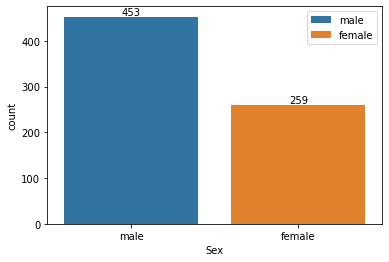

In [18]:
cols = ['Sex', 'count']
sex = ['male', 'female']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Sex'].value_counts()
train_df = pd.DataFrame(
    data=[
        [sex[0], train_counts[0]],
        [sex[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Sex',y='count',data=res_df,hue='Sex', dodge=False)
plt.legend(loc="upper right")
plt.show()


In [19]:
data['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

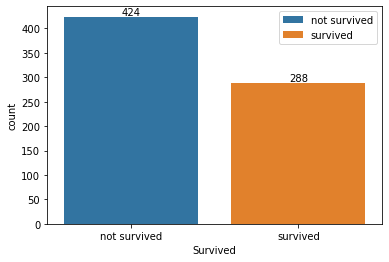

In [21]:
cols = ['Survived', 'count']
survived = ['not survived', 'survived']
res_df = pd.DataFrame(columns=cols, dtype='object')

train_counts = data['Survived'].value_counts()
train_df = pd.DataFrame(
    data=[
        [survived[0], train_counts[0]],
        [survived[1], train_counts[1]]
    ],
    columns=cols
)

res_df = pd.concat([train_df])

for i in res_df.index:
    count = res_df.loc[i, 'count']
    y = res_df.loc[i, 'count']
    plt.annotate(count, (i, y), ha="center", va="bottom")

sns.barplot(x='Survived',y='count',data=res_df,hue='Survived', dodge=False)
plt.legend(loc="upper right")
plt.show()

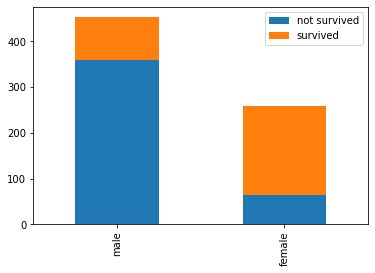

In [27]:
survived = data[data['Survived'] == 1]
man_surv = len(survived[survived['Sex'] == 0].index)
woman_surv = len(survived[survived['Sex'] == 1].index)

not_survived = data[data['Survived'] == 0]
man_not = len(not_survived[not_survived['Sex'] == 0].index)
woman_not = len(not_survived[not_survived['Sex'] == 1].index)


res_df = pd.DataFrame(
    {
        'not survived': [man_not, woman_not],
        'survived': [man_surv, woman_surv],
    },
    index=['male', 'female']
)

res_df.plot(kind='bar', stacked=True)#, color=['red', 'pink'])
plt.legend(loc="upper right")
plt.show()

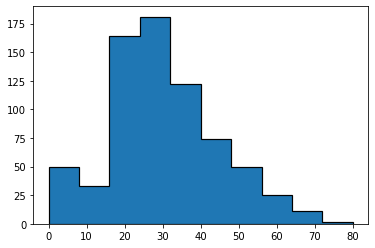

In [23]:
# data['Age'].hist()
plt.hist(data['Age'], histtype="stepfilled", edgecolor='k', linewidth=1.2)
plt.show()